### experiments using IPC classes for originality 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

%matplotlib inline
%reload_ext line_profiler



In [2]:
%%time
# read in main data file in the Strata9 .dta format
cite76_06_df = pd.read_stata('cite76_06.dta')


CPU times: user 986 ms, sys: 693 ms, total: 1.68 s
Wall time: 1.71 s


In [3]:
cite76_06_df.head()

,citing,cited,ncites7606
0,5135226,3930271,6
1,5592695,3930271,6
2,5621918,3930271,6
3,5624296,3930271,6
4,5675839,3930271,6


In [4]:
# get the IPC classes in these backward citations
# Load  data file with inter_ etc

pat76_06_ipc_raw_df = pd.read_csv('pat76_06_ipc_df_modified.csv')

In [5]:
# check formats for icl_class_uc
# https://stackoverflow.com/questions/38054373/trying-to-check-if-string-in-python-follows-the-correct-pattern-good-formatting
import re
def check_code(value, pattern=re.compile("[A-H][0-9][0-9][A-Z]")):
    return 'OK' if pattern.match(value) else 'NOK'



In [6]:
# lets get a check for any icl_class_uc (IPC4) that are types (have wrong format)
pat76_06_ipc_raw_df['code_check'] = pat76_06_ipc_raw_df['icl_class_uc'].apply(check_code)



In [7]:
# remove those that have wrong code format
pat76_06_ipc_df = pat76_06_ipc_raw_df[pat76_06_ipc_raw_df.code_check=='OK']

In [8]:
# lets see how many, and what they are, for the wrong format rows
wrong_format = pat76_06_ipc_raw_df[pat76_06_ipc_raw_df.code_check=='NOK']

In [9]:
wrong_format.head().T

,12377,17544,26562,32942,44415
appyear,1974,1974,1974,1973,1974
cat,5,5,1,1,2
gyear,1976,1976,1976,1976,1976
icl,FO4C 300,B00,C07,C10,HOlP 308
icl_class,FO4C,B00,C07,C10,HOlP
icl_maingroup,3,NaN,NaN,NaN,3
iclnum,1,1,1,1,1
nclass,418,152,546,510,333
numipc,1,1,1,1,3
patent,3938918,3942574,3948922,3953379,3961291


In [10]:
# lets take a row for an example
n = 5000000
focal_patent = cite76_06_df[n:(n+1)].citing.values[0]
focal_patent

4692752

In [11]:
# get all backward citations for this focal patent
example_focal_patent = cite76_06_df[cite76_06_df.citing == focal_patent]
print(example_focal_patent)
# get list of backward citations
backward_citations = example_focal_patent.cited.values.tolist()
backward_citations

          citing    cited  ncites7606
697442   4692752  4010458           6
1396130  4692752  4087706          17
3542953  4692752  4319229          20
4555290  4692752  4422066          10
5000000  4692752  4465998           7
5496836  4692752  4514722          11
6244677  4692752  4586028           5


[4010458, 4087706, 4319229, 4422066, 4465998, 4514722, 4586028]

In [12]:
pat76_06_ipc_df.tail().T

,4856176,4856177,4856178,4856179,4856180
appyear,2000,2000,2000,2000,2000
cat,2,2,2,2,2
gyear,2006,2006,2006,2006,2006
icl,G06F 17/30,G06F 15/16,G06K 9/00,H04L 9/00,H04K 1/00
icl_class,G06F,G06F,G06K,H04L,H04K
icl_maingroup,17,15,9,9,1
iclnum,2,3,4,5,6
nclass,726,726,726,726,726
numipc,6,6,6,6,6
patent,7155745,7155745,7155745,7155745,7155745


In [13]:
#  now using only the four character IPC4
blob = []
for citation in backward_citations:
    print(citation)
    temp_class = list(set(pat76_06_ipc_df[pat76_06_ipc_df.patent==citation].icl_class_uc.values))
    print(temp_class)
    blob.append(temp_class)

4010458
['G08B']
4087706
['G08B', 'H01H', 'H03K']
4319229
['G08B']
4422066
['G08B', 'H01N']
4465998
['G08B']
4514722
['G08B']
4586028
['G08B']


In [14]:
blob

[['G08B'],
 ['G08B', 'H01H', 'H03K'],
 ['G08B'],
 ['G08B', 'H01N'],
 ['G08B'],
 ['G08B'],
 ['G08B']]

In [15]:
# get sections of focal patent, for comparison
pat76_06_ipc_df[pat76_06_ipc_df.patent==focal_patent].icl_class_uc.values

array(['G08B'], dtype=object)

In [16]:
## calculate originality of this patent
number_backward_citations = len(blob)
print('number backward citations = ',number_backward_citations)
# create single list by flattening through numpy concat
flat_list = list(np.concatenate(blob))
print('flat_list = ',flat_list)
# get number of each unique element in this list
unique_elements = list(set(flat_list))
print('unique_elements = ',unique_elements)
zz = [(flat_list.count(i)) for i in set(flat_list) ]

# do the sume of squares for unoriginality
sum = 0
for item in zz:
    print('item = ',item)
    zzz = pow((item/number_backward_citations),2)
    print('zzz = ',zzz)
    sum = sum+zzz
    print('sum = ',sum)
unoriginality = sum
print('unoriginality = ',unoriginality)
originality_focal_patent = 1 - unoriginality
originality_focal_patent

number backward citations =  7
flat_list =  ['G08B', 'G08B', 'H01H', 'H03K', 'G08B', 'G08B', 'H01N', 'G08B', 'G08B', 'G08B']
unique_elements =  ['G08B', 'H01H', 'H01N', 'H03K']
item =  7
zzz =  1.0
sum =  1.0
item =  1
zzz =  0.02040816326530612
sum =  1.0204081632653061
item =  1
zzz =  0.02040816326530612
sum =  1.0408163265306123
item =  1
zzz =  0.02040816326530612
sum =  1.0612244897959184
unoriginality =  1.0612244897959184


-0.061224489795918435

In [17]:
## calculate originality of this patent, made into a function
def get_class_originality(focal_patent):
    example_focal_patent = cite76_06_df[cite76_06_df.citing == focal_patent]
    # print(example_focal_patent)
    # get list of backward citations
    backward_citations = example_focal_patent.cited.values.tolist()
    backward_citations
    blob = []
    for citation in backward_citations:
        #print(citation)
        temp_class = list(set(pat76_06_ipc_df[pat76_06_ipc_df.patent==citation].section.values))
        #print(temp_class)
        blob.append(temp_class)
    
    number_backward_citations = len(blob)
    #print('number backward citations = ',number_backward_citations)
    # create single list by flattening through numpy concat
    flat_list = list(np.concatenate(blob))
    #print('flat_list = ',flat_list)
    # get number of each unique element in this list
    unique_elements = list(set(flat_list))
    #print('unique_elements = ',unique_elements)
    zz = [(flat_list.count(i)) for i in set(flat_list) ]

    # do the sum of squares for unoriginality
    sum = 0
    for item in zz:
        #print('item = ',item)
        zzz = pow((item/number_backward_citations),2)
        #print('zzz = ',zzz)
        sum = sum+zzz
        #print('sum = ',sum)
    unoriginality = sum
    #print('unoriginality = ',unoriginality)
    originality_focal_patent = 1 - unoriginality
    return(originality_focal_patent)

In [18]:
## calculate sctions in this patent,  a function
def get_class_count(focal_patent):
    example_focal_patent = cite76_06_df[cite76_06_df.citing == focal_patent]
    # print(example_focal_patent)
    # get list of backward citations
    backward_citations = example_focal_patent.cited.values.tolist()
    accumulator = []
    for citation in backward_citations:
        #print(citation)
        temp_classes = list(set(pat76_06_ipc_df[pat76_06_ipc_df.patent==citation].icl_class_uc.values))
        #print(temp_class)
        accumulator.append(temp_classes)
    
    number_backward_citations = len(accumulator)
    #print('number backward citations = ',number_backward_citations)
    # create single list by flattening through numpy concat
    flat_list = list(np.concatenate(accumulator))
    #print('flat_list = ',flat_list)
    # get number of each unique element in this list
    num_unique_elements = len(set(flat_list))
    #print('unique_elements = ',unique_elements)
    return(num_unique_elements)

In [19]:
j=7155745
%lprun -f get_class_count(j) xx= get_class_count(j)
xx= get_class_count(j)
xx

/Users/ahuxor/anaconda/lib/python3.4/site-packages/line_profiler.py:294: UserWarning: Could not extract a code object for the object 8
  profile = LineProfiler(*funcs)


8

In [20]:
get_class_count(7155745)

8

In [21]:
pat76_06_assg_df = pd.read_stata('pat76_06_assg.dta')


In [22]:
pat76_06_assg_df.head().T

,0,1,2,3,4
allcites,6,0,20,4,1
appyear,1974,1974,1975,1974,1975
asscode,2,2,2,1,1
assgnum,1,1,1,NaN,NaN
cat,6,6,6,5,6
cat_ocl,6,6,6,NaN,6
cclass,2/161.4,5/11,5/430,114/354,12/142S
country,US,US,US,,
ddate,NaT,NaT,NaT,NaT,NaT
gday,6,6,6,6,6


In [23]:
cite76_06_df.head().T

,0,1,2,3,4
citing,5135226,5592695,5621918,5624296,5675839
cited,3930271,3930271,3930271,3930271,3930271
ncites7606,6,6,6,6,6


In [24]:
sample_patents = cite76_06_df[1000000:100100].citing.values.tolist()
len(sample_patents)

0

In [25]:
len(cite76_06_df)

23650891

In [26]:
%%time

# works up to 14000 patents, with t=32 mins
patent_list = []
class_counts_list = []
num_forward_cites_list = []
for patent in sample_patents:
    xx = get_class_count(patent)
    patent_list.append(patent)
    class_counts_list.append(xx)
    num_forward_cites = pat76_06_assg_df[pat76_06_assg_df.patent == patent].allcites.values[0]
    num_forward_cites_list.append(num_forward_cites)

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 32.9 µs


In [27]:
# create dataframe from these lists
class_counts_df = pd.DataFrame(
    {'patent': patent_list,
     'number_of_classes': class_counts_list,
     'forward_citations': num_forward_cites_list
    })

In [28]:
class_counts_df.head()

,forward_citations,number_of_classes,patent


/Users/ahuxor/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:36: RuntimeWarning: divide by zero encountered in log10


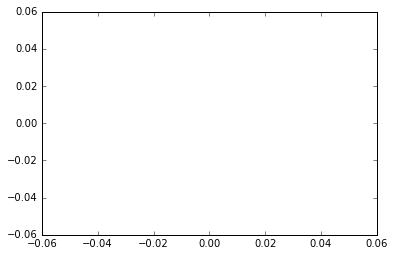

In [29]:
one_class=class_counts_df[class_counts_df.number_of_classes==1]
two_class=class_counts_df[class_counts_df.number_of_classes==2]
three_class=class_counts_df[class_counts_df.number_of_classes==3]
four_class=class_counts_df[class_counts_df.number_of_classes==4]
five_class=class_counts_df[class_counts_df.number_of_classes==5]
six_class=class_counts_df[class_counts_df.number_of_classes==6]
seven_class=class_counts_df[class_counts_df.number_of_classes==7]
eight_class=class_counts_df[class_counts_df.number_of_classes==8]

ten_class=class_counts_df[class_counts_df.number_of_classes==10]
eleven_class=class_counts_df[class_counts_df.number_of_classes==11]
twelve_class=class_counts_df[class_counts_df.number_of_classes==12]

fifteen_class=class_counts_df[class_counts_df.number_of_classes==15]



twenty_class=class_counts_df[class_counts_df.number_of_classes==20]
twentyone_class=class_counts_df[class_counts_df.number_of_classes==21]





#plot distribution of one section
counts,bins = np.histogram(twenty_class.forward_citations,bins=10)

slope_list = []
intercept_list = []
R_squared_list = []

x = bins[1:]
y = counts

logx = np.log10(x)
logy = np.log10(y)
plt.plot(logx,logy)

In [30]:
class_counts_df[class_counts_df.number_of_classes==25]

,forward_citations,number_of_classes,patent


In [31]:
%%time
# works up to 5000 patents, with t=13 mins
patent_list = []
originality_list = []
num_forward_cites_list = []
for patent in sample_patents:
    xx = get_class_originality(patent)
    patent_list.append(patent)
    originality_list.append(xx)
    num_forward_cites = pat76_06_assg_df[pat76_06_assg_df.patent == patent].allcites.values[0]
    num_forward_cites_list.append(num_forward_cites)

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 11.9 µs


# Need to use subset of dates and of section
to avoid truncation at  end go only to 2001 (5 years buffer for forward citation truncation), and go for those that have at least one classification in the G-section




In [32]:
# get date selection first,  to 2001 inclusive
pat76_01_assg_df = pat76_06_assg_df[(pat76_06_assg_df.gyear<2002)]

In [33]:
# get date selection first, to 2001 inclusive, for patent class data
pat76_01_ipc_df = pat76_06_ipc_df[(pat76_06_ipc_df.gyear<2002)]

In [34]:
# get subset of patents with a G from the ipc-database
# by selecting the patent numbers, we should be able later to recover those patents that are
# also in other sections
cite76_01_ipc_df_g_section = pat76_01_ipc_df[pat76_01_ipc_df.section=='G']


In [35]:
# from this df, get list of unique patents
patents_with_g_section = list(set(cite76_01_ipc_df_g_section.patent.tolist()))
# this leaves some 3/4 million patents (rather than full set)
len(patents_with_g_section)

497541

In [36]:
# now create new df of these patents, from the pat76_01_ipc_df
# this will catch those patents that have non-G section and make these sections available
pat76_01_ipc_df_g_sect_all = pat76_01_ipc_df[pat76_01_ipc_df['patent'].isin(patents_with_g_section)]

In [37]:
pat76_01_ipc_df_g_sect_all.head().T

,65,69,70,77,78
appyear,1974,1975,1975,1974,1974
cat,6,6,6,6,6
gyear,1976,1976,1976,1976,1976
icl,G01C 1902,G09B 306,A63F 300,G09D 306,G09F 708
icl_class,G01C,G09B,A63F,G09D,G09F
icl_maingroup,19,3,3,3,7
iclnum,1,1,2,1,1
nclass,33,434,434,40,40
numipc,1,2,2,1,1
patent,3930317,3930321,3930321,3930326,3930327


In [38]:
# get number of rows of G section (inc various sub-classes), and non-G section
print(len(pat76_01_ipc_df_g_sect_all[pat76_01_ipc_df_g_sect_all.section=='G']))
print(len(pat76_01_ipc_df_g_sect_all[pat76_01_ipc_df_g_sect_all.section!='G']))
print(len(pat76_01_ipc_df_g_sect_all))

661724
99372
761096


In [39]:
# now create new df of these patents, from the pat81_01_assg_df
pat76_01_assg_df_g_sect = pat76_01_assg_df[pat76_01_assg_df['patent'].isin(patents_with_g_section)]

In [40]:
pat76_01_assg_df_g_sect.head().T

,48,52,57,58,91
allcites,4,0,2,3,0
appyear,1974,1975,1974,1974,1974
asscode,6,1,1,2,2
assgnum,1,NaN,NaN,1,1
cat,6,6,6,6,6
cat_ocl,6,NaN,6,6,NaN
cclass,33/318,434/334,40/114,40/620,368/257
country,US,,,US,US
ddate,NaT,NaT,NaT,NaT,NaT
gday,6,6,6,6,6


In [41]:
# get our list of unique patent numbers, where there is one or more G-sections
len(patents_with_g_section)

497541

In [42]:
## calculate sections in this patent,  a function
def get_section_count_g(focal_patent):
    sections = list(set(pat76_01_ipc_df_g_sect_all[pat76_01_ipc_df_g_sect_all.patent==focal_patent].section.values))
    num_unique_elements = len(sections)
    return(num_unique_elements)

In [43]:
sample_patents = patents_with_g_section
len(sample_patents)

497541

In [44]:
%%time
!date
# get sections for all 76_01 g-section data
# works for all, t = 48 min
patent_list = []
sections_counts_list = []
num_forward_cites_list = []
for patent in sample_patents:
    xx = get_section_count_g(patent)
    patent_list.append(patent)
    sections_counts_list.append(xx)
    num_forward_cites = pat76_01_assg_df[pat76_01_assg_df.patent == patent].allcites.values[0]
    num_forward_cites_list.append(num_forward_cites)

Fri 25 Aug 2017 11:37:04 BST
CPU times: user 43min 51s, sys: 26.8 s, total: 44min 18s
Wall time: 44min 49s


In [45]:
# create dataframe from these lists
section_counts_df = pd.DataFrame(
    {'patent': patent_list,
     'number_of_sections': sections_counts_list,
     'forward_citations': num_forward_cites_list
    })

In [46]:
# save this as a csv file for later use (as each takes about an hour to generate)
section_counts_df.to_csv('section_counts_df.csv', index=False)

(0, 600)

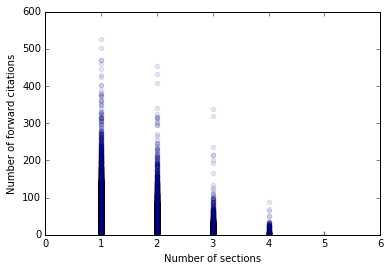

In [47]:
plt.scatter(section_counts_df.number_of_sections,section_counts_df.forward_citations,alpha=0.1)
plt.ylabel('Number of forward citations')
plt.xlabel('Number of sections')
plt.ylim([0,600])

In [48]:
# get ratio for patents with =<200 forward citations over those with >200 
test = section_counts_df[section_counts_df.number_of_sections == 4]
yy = test.forward_citations.tolist()
yyGTE200 = [i for i in yy if i >= 200]
yyLE200 = [i for i in yy if i < 200]

print(len(yyGTE200))
print(len(yyLE200))
print(len(yyGTE200)/len(yyLE200))

0
171
0.0


plot_number =  1
number patents =  428195


/Users/ahuxor/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log10
/Users/ahuxor/.local/lib/python3.4/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Users/ahuxor/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log10


plot_number =  2
number patents =  64365
plot_number =  3
number patents =  4809
plot_number =  4
number patents =  171


/Users/ahuxor/anaconda/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


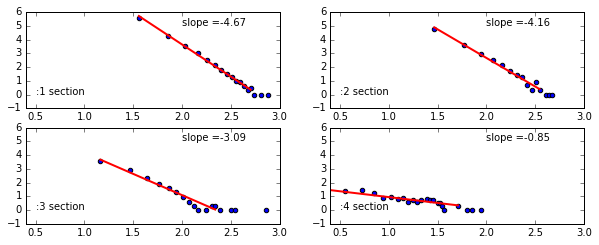

In [49]:
# get a set of plots for the slopes

# first, get max number of sections for any patent
max_num_sections = max(section_counts_df.number_of_sections)

slope_list = []
intercept_list = []
R_squared_list = []
legend_text1 = ['1 section','2 section','3 section', '4 section','5 section']
fig = plt.figure(figsize=(10,10))


for plot_number in range(1,(max_num_sections)):
    print('plot_number = ',plot_number)
    # get subset of those with 'x' sections
    x_sections = section_counts_df[section_counts_df.number_of_sections == plot_number]
    print('number patents = ', len(x_sections))
    x_forward_citations = x_sections.forward_citations
    #print(x_forward_citations)
    hist_data = np.histogram(x_forward_citations,bins=50)
    #print(hist_data)
    x = hist_data[1][1:]
    y = hist_data[0][0:]
    logx = np.log10(x)
    logy = np.log10(y)
    # create dataframe from log values
    # as this may help get them into a regression
    logged_df = pd.DataFrame({'logx':logx, 'logy':logy})
    
    # remove rows with NaN/Inf etc
    clean_logged_df = logged_df.replace([np.inf, -np.inf], np.nan)
    clean_logged_df = clean_logged_df.dropna()

    clean_logged_df_trim = clean_logged_df[clean_logged_df.logy>0]
    
    from sklearn import linear_model
    linear = linear_model.LinearRegression()
    trainX = np.asarray(clean_logged_df_trim.logx[:]).reshape(-1, 1)
    trainY = np.asarray(clean_logged_df_trim.logy[:]).reshape(-1, 1)
    testX = np.asarray(clean_logged_df_trim.logx).reshape(-1, 1)
    testY = np.asarray(clean_logged_df_trim.logy).reshape(-1, 1)
    linear.fit(trainX, trainY)
    linear.score(trainX, trainY)
    slope_list.append(linear.coef_[0][0])
    #print('Coefficient: \n', linear.coef_[0][0])
    intercept_list.append(linear.intercept_[0])
    #print('Intercept: \n', linear.intercept_[0])
    R_squared_list.append(linear.score(trainX, trainY))
    #print('R² Value: \n', linear.score(trainX, trainY))
    predicted = linear.predict(trainX)
    linear.fit(trainX, trainY)
    
    bin_name = legend_text1[(plot_number-1)]
    slope_text = 'slope =' + format(linear.coef_[0][0],'.2f') 
    ax = fig.add_subplot(5,2,plot_number)
    ax.scatter(logged_df.logx, logged_df.logy)
    ax.plot(testX, linear.predict(testX), color='red', linewidth=2)
    ax.set_xlim([0.4,3])
    ax.set_ylim([-1.0,6])
    ax.text(0.5, 0, ':'+bin_name)
    ax.text(2, 5, slope_text)

fig.show()

## now for IPC4 classes

In [50]:
## calculate IPC4 classes in this patent
def get_ipc4_count_g(focal_patent):
    ipc4s = list(set(pat76_01_ipc_df_g_sect_all[pat76_01_ipc_df_g_sect_all.patent==focal_patent].icl_class_uc.values))
    num_unique_elements = len(ipc4s)
    return(num_unique_elements)

In [51]:
# new sample for testing IPC4 classes plots
sample_patents_ipc4 = patents_with_g_section
len(sample_patents_ipc4)

497541

In [52]:
%%time
!date
# get sections for all 76_01 IPC4 classes data
# works for all, t = 50 min
patent_list = []
ipc4_counts_list = []
num_forward_cites_list = []
for patent in sample_patents_ipc4:
    xx = get_ipc4_count_g(patent)
    patent_list.append(patent)
    ipc4_counts_list.append(xx)
    num_forward_cites = pat76_01_assg_df[pat76_01_assg_df.patent == patent].allcites.values[0]
    num_forward_cites_list.append(num_forward_cites)

Fri 25 Aug 2017 12:22:02 BST
CPU times: user 48min 10s, sys: 57.5 s, total: 49min 7s
Wall time: 50min 17s


In [53]:
# create dataframe from these lists
ipc4_counts_df = pd.DataFrame(
    {'patent': patent_list,
     'number_of_ipc4': ipc4_counts_list,
     'forward_citations': num_forward_cites_list
    })

In [54]:
# save this as a csv file for later use (as each takes about an hour to generate)
ipc4_counts_df.to_csv('ipc4_counts_df.csv', index=False)

(0, 2000)

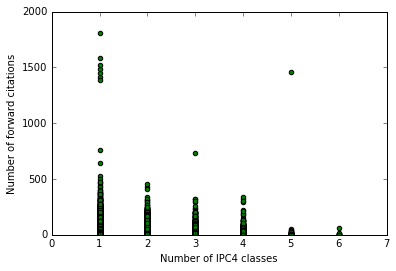

In [55]:
plt.scatter(ipc4_counts_df.number_of_ipc4,ipc4_counts_df.forward_citations,alpha=1,c='g')
plt.ylabel('Number of forward citations')
plt.xlabel('Number of IPC4 classes')
plt.ylim([0,2000])

In [56]:
# can split of one IPC4 tell us about any features that create high citation?
one_ipc4 = ipc4_counts_df[ipc4_counts_df.number_of_ipc4 == 1]
high_cited = one_ipc4[one_ipc4.forward_citations>1000]
hi_cited_patents = high_cited.patent.tolist()
# get details on these highly cited patents

for a_patent in hi_cited_patents:
    print(patent)
    zzz = pat76_01_assg_df[pat76_01_assg_df.patent == a_patent]
    print(zzz.icl)

4194303
386465    G01D 1518
Name: icl, dtype: object
4194303
418936    G01D 1518
Name: icl, dtype: object
4194303
534645    G01D 1516
Name: icl, dtype: object
4194303
538455    G01D 1518
Name: icl, dtype: object
4194303
634740    G01D 1518
Name: icl, dtype: object
4194303
802010    G01D 1516
Name: icl, dtype: object
4194303
820002    G01D 1516
Name: icl, dtype: object


In [57]:
zzz.T

,820002
allcites,1519
appyear,1986
asscode,3
assgnum,1
cat,2
cat_ocl,4
cclass,347/56
country,JP
ddate,NaT
gday,26


In [58]:
# get ratio for patents with =<n forward citations over those with >n
n = 100
for k in range(1,7):
    test = ipc4_counts_df[ipc4_counts_df.number_of_ipc4 == k]
    yy = test.forward_citations.tolist()
    yyGTE200 = [i for i in yy if i >= 200]
    yyLE200 = [i for i in yy if i < 200]
    print('num IPC4 classes = ',k)
    print(len(yyGTE200))
    print(len(yyLE200))
    print(len(yyGTE200)/len(yyLE200))
    print('......')

num IPC4 classes =  1
183
397759
0.00046007758466810303
......
num IPC4 classes =  2
46
79102
0.0005815276478470835
......
num IPC4 classes =  3
13
17106
0.000759967262948673
......
num IPC4 classes =  4
6
3200
0.001875
......
num IPC4 classes =  5
1
113
0.008849557522123894
......
num IPC4 classes =  6
0
12
0.0
......


In [59]:
ipc4_counts_df[ipc4_counts_df.number_of_ipc4==6]

,forward_citations,number_of_ipc4,patent
5283,0,6,6300142
72026,0,6,5866635
75299,4,6,5242964
134687,11,6,6312914
150614,63,6,4535058
161495,4,6,4560257
206483,1,6,4665033
269279,2,6,5850342
310930,0,6,6182932
354612,6,6,6036891


plot_number =  1
number patents =  397942
plot_number =  2
number patents =  79148
plot_number =  3
number patents =  17119


/Users/ahuxor/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log10


plot_number =  4
number patents =  3206
plot_number =  5
number patents =  114


/Users/ahuxor/anaconda/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


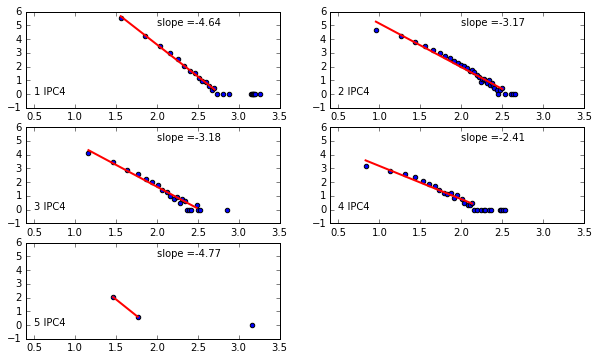

In [60]:
# get a set of plots for the slopes

# first, get max number of sections for any patent
max_num_ipc4 = max(ipc4_counts_df.number_of_ipc4)

slope_list = []
intercept_list = []
R_squared_list = []
legend_text1 = ['1 IPC4','2 IPC4','3 IPC4', '4 IPC4','5 IPC4','6 IPC4']
fig = plt.figure(figsize=(10,10))


for plot_number in range(1,(max_num_ipc4)):
    print('plot_number = ',plot_number)
    # get subset of those with 'x' ipc4 classes
    x_ipc4 = ipc4_counts_df[ipc4_counts_df.number_of_ipc4 == plot_number]
    print('number patents = ', len(x_ipc4))
    x_forward_citations = x_ipc4.forward_citations
    #print(x_forward_citations)
    hist_data = np.histogram(x_forward_citations,bins=50)
    #print(hist_data)
    x = hist_data[1][1:]
    y = hist_data[0][0:]
    logx = np.log10(x)
    logy = np.log10(y)
    # create dataframe from log values
    # as this may help get them into a regression
    logged_df = pd.DataFrame({'logx':logx, 'logy':logy})
    
    # remove rows with NaN/Inf etc
    clean_logged_df = logged_df.replace([np.inf, -np.inf], np.nan)
    clean_logged_df = clean_logged_df.dropna()

    clean_logged_df_trim = clean_logged_df[clean_logged_df.logy>0]
    
    from sklearn import linear_model
    linear = linear_model.LinearRegression()
    trainX = np.asarray(clean_logged_df_trim.logx[:]).reshape(-1, 1)
    trainY = np.asarray(clean_logged_df_trim.logy[:]).reshape(-1, 1)
    testX = np.asarray(clean_logged_df_trim.logx).reshape(-1, 1)
    testY = np.asarray(clean_logged_df_trim.logy).reshape(-1, 1)
    linear.fit(trainX, trainY)
    linear.score(trainX, trainY)
    slope_list.append(linear.coef_[0][0])
    #print('Coefficient: \n', linear.coef_[0][0])
    intercept_list.append(linear.intercept_[0])
    #print('Intercept: \n', linear.intercept_[0])
    R_squared_list.append(linear.score(trainX, trainY))
    #print('R² Value: \n', linear.score(trainX, trainY))
    predicted = linear.predict(trainX)
    linear.fit(trainX, trainY)
    
    bin_name = legend_text1[(plot_number-1)]
    slope_text = 'slope =' + format(linear.coef_[0][0],'.2f') 
    ax = fig.add_subplot(5,2,plot_number)
    ax.scatter(logged_df.logx, logged_df.logy)
    ax.plot(testX, linear.predict(testX), color='red', linewidth=2)
    ax.set_xlim([0.4,3.5])
    ax.set_ylim([-1.0,6])
    ax.text(0.5, 0, bin_name)
    ax.text(2, 5, slope_text)

fig.show()

# Now for IPC_inter classes

In [61]:
## calculate IPC_inter classes in this patent
def get_ipc_inter_count_g(focal_patent):
    ipcinters = list(set(pat76_01_ipc_df_g_sect_all[pat76_01_ipc_df_g_sect_all.patent==focal_patent].ipc_inter.values))
    num_unique_elements = len(ipcinters)
    return(num_unique_elements)

In [62]:
# new sample for testing IPC4 classes plots
sample_patents_ipcinter = patents_with_g_section
len(sample_patents_ipcinter)

497541

In [63]:
%%time
!date
# get sections for all 76_01 IPC_inter classes data
# works for all, t = 50 min
patent_list = []
ipcinter_counts_list = []
num_forward_cites_list = []
for patent in sample_patents_ipcinter:
    xx = get_ipc_inter_count_g(patent)
    patent_list.append(patent)
    ipcinter_counts_list.append(xx)
    num_forward_cites = pat76_01_assg_df[pat76_01_assg_df.patent == patent].allcites.values[0]
    num_forward_cites_list.append(num_forward_cites)

Fri 25 Aug 2017 13:12:27 BST
CPU times: user 44min 59s, sys: 31.8 s, total: 45min 30s
Wall time: 46min 5s


In [64]:
# create dataframe from these lists
ipc_inter_counts_df = pd.DataFrame(
    {'patent': patent_list,
     'number_of_ipc_inter': ipcinter_counts_list,
     'forward_citations': num_forward_cites_list
    })

In [65]:
# save this as a csv file for later use (as each takes about an hour to generate)
ipc_inter_counts_df.to_csv('ipc_inter_counts_df.csv', index=False)

In [66]:
ipc_inter_counts_df.head()

,forward_citations,number_of_ipc_inter,patent
0,10,2,4194304
1,5,1,4194305
2,2,1,4194306
3,1,1,4194307
4,59,2,4194313


(0, 600)

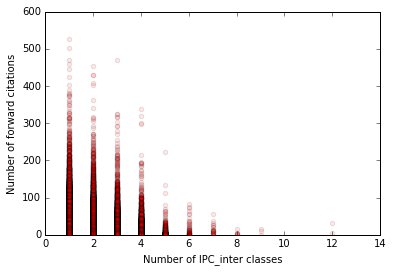

In [67]:
plt.scatter(ipc_inter_counts_df.number_of_ipc_inter,ipc_inter_counts_df.forward_citations,alpha=0.1,c='r')
plt.ylabel('Number of forward citations')
plt.xlabel('Number of IPC_inter classes')
plt.ylim([0,600])

plot_number =  1
number patents =  357158
plot_number =  2
number patents =  103875
plot_number =  3
number patents =  28028
plot_number =  4
number patents =  7944


/Users/ahuxor/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log10


plot_number =  5
number patents =  445
plot_number =  6
number patents =  55
plot_number =  7
number patents =  24
plot_number =  8
number patents =  7


/Users/ahuxor/anaconda/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


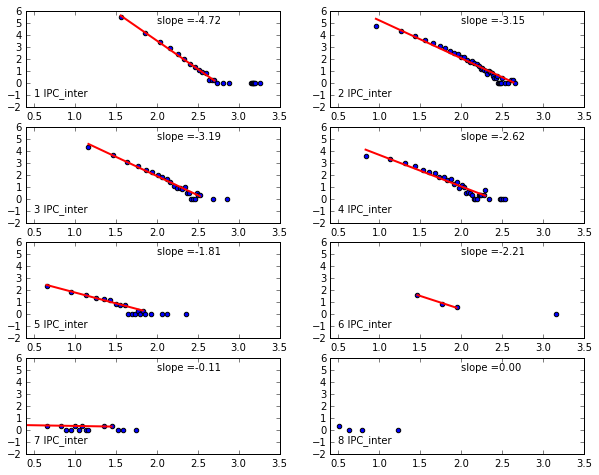

In [69]:
# get a set of plots for the slopes

# first, get max number of sections for any patent
max_num_ipcinter = max(ipc_inter_counts_df.number_of_ipc_inter)

slope_list = []
intercept_list = []
R_squared_list = []
legend_text1 = ['1 IPC_inter','2 IPC_inter','3 IPC_inter', '4 IPC_inter','5 IPC_inter', \
                '6 IPC_inter','7 IPC_inter','8 IPC_inter','9 IPC_inter']
fig = plt.figure(figsize=(10,10))


for plot_number in range(1,9):
    print('plot_number = ',plot_number)
    # get subset of those with 'x' ipcinter classes
    x_ipcinter = ipc4_counts_df[ipc_inter_counts_df.number_of_ipc_inter == plot_number]
    print('number patents = ', len(x_ipcinter))
    x_forward_citations = x_ipcinter.forward_citations
    #print(x_forward_citations)
    hist_data = np.histogram(x_forward_citations,bins=50)
    #print(hist_data)
    x = hist_data[1][1:]
    y = hist_data[0][0:]
    logx = np.log10(x)
    logy = np.log10(y)
    # create dataframe from log values
    # as this may help get them into a regression
    logged_df = pd.DataFrame({'logx':logx, 'logy':logy})
    
    # remove rows with NaN/Inf etc
    clean_logged_df = logged_df.replace([np.inf, -np.inf], np.nan)
    clean_logged_df = clean_logged_df.dropna()

    clean_logged_df_trim = clean_logged_df[clean_logged_df.logy>0]
    
    from sklearn import linear_model
    linear = linear_model.LinearRegression()
    trainX = np.asarray(clean_logged_df_trim.logx[:]).reshape(-1, 1)
    trainY = np.asarray(clean_logged_df_trim.logy[:]).reshape(-1, 1)
    testX = np.asarray(clean_logged_df_trim.logx).reshape(-1, 1)
    testY = np.asarray(clean_logged_df_trim.logy).reshape(-1, 1)
    linear.fit(trainX, trainY)
    linear.score(trainX, trainY)
    slope_list.append(linear.coef_[0][0])
    #print('Coefficient: \n', linear.coef_[0][0])
    intercept_list.append(linear.intercept_[0])
    #print('Intercept: \n', linear.intercept_[0])
    R_squared_list.append(linear.score(trainX, trainY))
    #print('R² Value: \n', linear.score(trainX, trainY))
    predicted = linear.predict(trainX)
    linear.fit(trainX, trainY)
    
    bin_name = legend_text1[(plot_number-1)]
    slope_text = 'slope =' + format(linear.coef_[0][0],'.2f') 
    ax = fig.add_subplot(5,2,plot_number)
    ax.scatter(logged_df.logx, logged_df.logy)
    ax.plot(testX, linear.predict(testX), color='red', linewidth=2)
    ax.set_xlim([0.4,3.5])
    ax.set_ylim([-2.0,6])
    ax.text(0.5, -1.0, bin_name)
    ax.text(2, 5, slope_text)

fig.show()

# Now for full IPC code

In [70]:
## calculate full IPC classes in this patent
def get_ipc_full_count_g(focal_patent):
    ipc_full = list(set(pat76_01_ipc_df_g_sect_all[pat76_01_ipc_df_g_sect_all.patent==focal_patent].icl_uc.values))
    num_unique_elements = len(ipc_full)
    return(num_unique_elements)

In [71]:
# new sample for testing IPC4 classes plots
sample_patents_ipc_full = patents_with_g_section
len(sample_patents_ipc_full)

497541

In [72]:
%%time
!date
# get sections for all 76_01 IPC full classes data
# works for all, t = 50 min
patent_list = []
ipc_full_counts_list = []
num_forward_cites_list = []
for patent in sample_patents_ipc_full:
    xx = get_ipc_full_count_g(patent)
    patent_list.append(patent)
    ipc_full_counts_list.append(xx)
    num_forward_cites = pat76_01_assg_df[pat76_01_assg_df.patent == patent].allcites.values[0]
    num_forward_cites_list.append(num_forward_cites)

Fri 25 Aug 2017 14:00:03 BST
CPU times: user 43min 13s, sys: 39 s, total: 43min 52s
Wall time: 44min 21s


In [73]:
# create dataframe from these lists
ipc_full_counts_df = pd.DataFrame(
    {'patent': patent_list,
     'number_of_ipc_full': ipc_full_counts_list,
     'forward_citations': num_forward_cites_list
    })

In [74]:
# save this as a csv file for later use (as each takes about an hour to generate)
ipc_full_counts_df.to_csv('ipc_full_counts_df.csv', index=False)

In [75]:
max(ipc_full_counts_df.number_of_ipc_full)

14

(0, 2000)

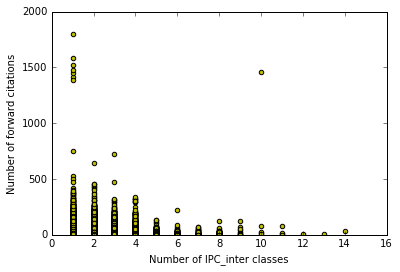

In [76]:
plt.scatter(ipc_full_counts_df.number_of_ipc_full,ipc_full_counts_df.forward_citations,alpha=1,c='y')
plt.ylabel('Number of forward citations')
plt.xlabel('Number of IPC_inter classes')
plt.ylim([0,2000])

In [77]:
max(ipc_full_counts_df.number_of_ipc_full)

14

plot_number =  1
number patents =  326061
plot_number =  2
number patents =  115170
plot_number =  3
number patents =  37151
plot_number =  4
number patents =  17599


/Users/ahuxor/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:26: RuntimeWarning: divide by zero encountered in log10


plot_number =  5
number patents =  1322
plot_number =  6
number patents =  109
plot_number =  7
number patents =  48
plot_number =  8
number patents =  56
plot_number =  9
number patents =  11
plot_number =  10
number patents =  5


/Users/ahuxor/anaconda/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


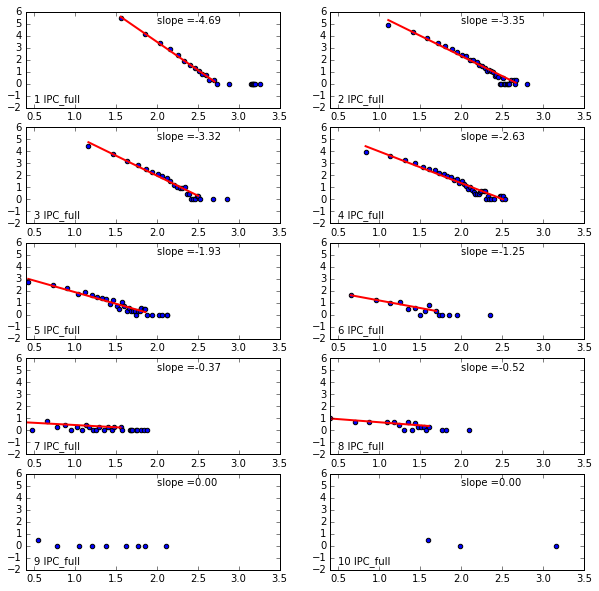

In [78]:
# get a set of plots for the slopes
# this code also ignore (for fitting) any lone valies (logy=0), as they mess up the fit
# creating a floor after a break int he slope
# first, get max number of sections for any patent
max_num_ipc_full = max(ipc_full_counts_df.number_of_ipc_full)

slope_list = []
intercept_list = []
R_squared_list = []
legend_text1 = ['1 IPC_full','2 IPC_full','3 IPC_full', '4 IPC_full','5 IPC_full', \
                '6 IPC_full','7 IPC_full','8 IPC_full','9 IPC_full','10 IPC_full']
fig = plt.figure(figsize=(10,10))


for plot_number in range(1,11):
    print('plot_number = ',plot_number)
    # get subset of those with 'x' ipcinter classes
    x_ipcfull = ipc_full_counts_df[ipc_full_counts_df.number_of_ipc_full == plot_number]
    print('number patents = ', len(x_ipcfull))
    x_forward_citations = x_ipcfull.forward_citations
    #print(x_forward_citations)
    hist_data = np.histogram(x_forward_citations,bins=50)
    #print(hist_data)
    x = hist_data[1][1:]
    y = hist_data[0][0:]
    logx = np.log10(x)
    logy = np.log10(y)
    # create dataframe from log values
    # as this may help get them into a regression
    logged_df = pd.DataFrame({'logx':logx, 'logy':logy})
    
    # remove rows with NaN/Inf etc
    clean_logged_df = logged_df.replace([np.inf, -np.inf], np.nan)
    clean_logged_df = clean_logged_df.dropna()

    clean_logged_df_trim = clean_logged_df[clean_logged_df.logy>0]
    
    from sklearn import linear_model
    linear = linear_model.LinearRegression()
    trainX = np.asarray(clean_logged_df_trim.logx[:]).reshape(-1, 1)
    trainY = np.asarray(clean_logged_df_trim.logy[:]).reshape(-1, 1)
    testX = np.asarray(clean_logged_df_trim.logx).reshape(-1, 1)
    testY = np.asarray(clean_logged_df_trim.logy).reshape(-1, 1)
    linear.fit(trainX, trainY)
    linear.score(trainX, trainY)
    slope_list.append(linear.coef_[0][0])
    #print('Coefficient: \n', linear.coef_[0][0])
    intercept_list.append(linear.intercept_[0])
    #print('Intercept: \n', linear.intercept_[0])
    R_squared_list.append(linear.score(trainX, trainY))
    #print('R² Value: \n', linear.score(trainX, trainY))
    predicted = linear.predict(trainX)
    linear.fit(trainX, trainY)
    
    bin_name = legend_text1[(plot_number-1)]
    slope_text = 'slope =' + format(linear.coef_[0][0],'.2f') 
    ax = fig.add_subplot(5,2,plot_number)
    ax.scatter(logged_df.logx, logged_df.logy)
    ax.plot(testX, linear.predict(testX), color='red', linewidth=2)
    ax.set_xlim([0.4,3.5])
    ax.set_ylim([-2.0,6])
    ax.text(0.5, -1.5, bin_name)
    ax.text(2, 5, slope_text)

fig.show()

In [79]:
# get ratio for patents with =<n forward citations over those with >n
n = 250
print('number of forward citations cut-off = ', n)
for k in range(1,11):
    test = ipc_full_counts_df[ipc_full_counts_df.number_of_ipc_full == k]
    yy = test.forward_citations.tolist()
    yyGTEn = [i for i in yy if i >= n]
    yyLTn = [i for i in yy if i < n]
    print('num IPC full codes = ',k)

    print('num GTE n is ',len(yyGTEn))
    print('num LT n is ',len(yyLTn))
    print('ratio is ',len(yyGTEn)/len(yyLTn))
    print('......')

number of forward citations cut-off =  250
num IPC full codes =  1
num GTE n is  60
num LT n is  326001
ratio is  0.00018404851518860372
......
num IPC full codes =  2
num GTE n is  31
num LT n is  115139
ratio is  0.0002692397884296372
......
num IPC full codes =  3
num GTE n is  10
num LT n is  37141
ratio is  0.00026924423144234134
......
num IPC full codes =  4
num GTE n is  8
num LT n is  17591
ratio is  0.0004547780114831448
......
num IPC full codes =  5
num GTE n is  0
num LT n is  1322
ratio is  0.0
......
num IPC full codes =  6
num GTE n is  0
num LT n is  109
ratio is  0.0
......
num IPC full codes =  7
num GTE n is  0
num LT n is  48
ratio is  0.0
......
num IPC full codes =  8
num GTE n is  0
num LT n is  56
ratio is  0.0
......
num IPC full codes =  9
num GTE n is  0
num LT n is  11
ratio is  0.0
......
num IPC full codes =  10
num GTE n is  1
num LT n is  4
ratio is  0.25
......


In [80]:
# maybe look at the relative likelihood of combinations, i.e a dyad A may be very 
# much more radical than another dyad B.

# look at IPC4 dyads (k=2)
ipc4_dyads = ipc4_counts_df[ipc4_counts_df.number_of_ipc4 == 2]
ipc4_dyads.head()
ipc4_dyads_patents = ipc4_dyads.patent.values.tolist()
len(ipc4_dyads_patents)

79148

In [81]:
# function to return list of positons in which two strings differ
# https://stackoverflow.com/questions/8545492/find-the-position-of-difference-between-two-strings
def dif(a, b):
    return [i for i in range(len(a)) if a[i] != b[i]]

In [82]:
len(ipc4_dyads_patents)

79148

In [87]:
%%time
# now do a loop for dyads
tech_dist_list = []
dyad_patents_list = []
for m in range(0,100):
    temp_patent = ipc4_dyads_patents[m]
    dyad_patents_list.append(temp_patent)
    temp_ipc4 = list(set(pat76_01_ipc_df_g_sect_all[pat76_01_ipc_df_g_sect_all.patent==temp_patent].icl_class_uc.values.tolist()))
    #print(temp_ipc4)
    dif_list = dif(temp_ipc4[0],temp_ipc4[1])
    #print(dif_list)
    # need some function that captures the intuition for distance
    distance_signifier = dif_list[0]
    #print(distance_signifier)
    distance = 1/pow(2,distance_signifier)
    #print('distance = ',distance)
    tech_dist_list.append(distance)

CPU times: user 247 ms, sys: 6.42 ms, total: 253 ms
Wall time: 258 ms


In [88]:
# create dataframe from these lists
ipc4_dyad_tech_dist_df = pd.DataFrame(
    {'patent': dyad_patents_list,
     'tech_dist': tech_dist_list
    })

In [84]:
# start with triads, looking at first two of the three
ipc4_triads = ipc4_counts_df[ipc4_counts_df.number_of_ipc4 == 3]
ipc4_triads_patents = ipc4_triads.patent.values.tolist()
len(ipc4_triads_patents)

17119

In [85]:
%%time
# now do a loop for first two of the traids
tech_dist_list = []
triad_patents_list = []
for m in range(1119,1131):
    temp_patent = ipc4_triads_patents[m]
    triad_patents_list.append(temp_patent)
    temp_ipc4 = list(set(pat76_01_ipc_df_g_sect_all[pat76_01_ipc_df_g_sect_all.patent==temp_patent].icl_class_uc.values.tolist()))
    #print(temp_ipc4)
    dif_list = dif(temp_ipc4[0],temp_ipc4[1])
    #print(dif_list)
    # need some function that captures the intuition for distance
    distance_signifier = dif_list[0]
    #print(distance_signifier)
    distance = 1/pow(2,distance_signifier)
    #print('distance = ',distance)
    tech_dist_list.append(distance)

CPU times: user 25.5 ms, sys: 1.55 ms, total: 27.1 ms
Wall time: 25.8 ms


In [ ]:
ipc4_dyad_tech_dist_df.head()
# merge this df to get allcites
resulting = pd.merge(ipc4_dyad_tech_dist_df, pat76_01_assg_df, on='patent')
resulting.head()

In [ ]:
plt.scatter(resulting.tech_dist,resulting.allcites,marker='o',alpha=0.2)

In [ ]:
# get ratio for patents with =<n forward citations over those with >n
n = 150
print('number of forward citations cut-off = ', n)
for k in [0.125,0.25,0.5,1]:
    test = resulting[resulting.tech_dist == k]
    yy = test.allcites.tolist()
    yyGTEn = [i for i in yy if i >= n]
    yyLTn = [i for i in yy if i < n]
    print('technological distance = ',k)

    print('num GTE n is ',len(yyGTEn))
    print('num LT n is ',len(yyLTn))
    print('ratio is ',len(yyGTEn)/len(yyLTn))
    print('......')

## Need to check if the data has only one USPTO classification per patent 
### if not, it is hard to see how their originality measure actually works 


In [ ]:
# can group by patent and then by nclass (the US classification code)?
# the number is the number of full icl codes that are in the section given
# we see that for nclass we get an empty df, while for section, we get many
x = pat76_06_ipc_df.groupby(['patent','nclass']).size()
y = pd.Series.to_frame(x, name ='number').reset_index()
print(y[y.duplicated('patent',keep=False)])
print('note, above is empty df')
print('.....')
a = pat76_06_ipc_df.groupby(['patent','section']).size()
b = pd.Series.to_frame(a, name ='number').reset_index()
print(b[b.duplicated('patent',keep=False)].head())

# Now look at seeing if we can see any best pairings of sections, for example.

In [89]:
# look at section dyads 
section_dyads = section_counts_df[section_counts_df.number_of_sections == 2]
section_dyads_patents = section_dyads.patent.values.tolist()
len(section_dyads_patents)

64365

In [90]:
# can use this as the df does not have the actual sections 
section_dyads.head()

,forward_citations,number_of_sections,patent
0,10,2,4194304
4,59,2,4194313
30,1,2,6252397
32,8,2,6291551
35,3,2,6291561
40,10,2,4194425
51,9,2,4194461
57,0,2,6291663
60,12,2,4194522
62,33,2,5835601
